# MNIST DATASET CLASSIFICATION PROBLEM

This is model which predicts whether the number is a square number or not by reading the digit

In [231]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

# Loading the data


In [232]:
Raw_train = pd.read_csv ('C:\\Users\\rohan\\coursera-dl\\mnist_train.csv')
Raw_test = pd.read_csv ('C:\\Users\\rohan\\coursera-dl\\mnist_test.csv')


#Separating Images and label
Y_train_orig = Raw_train['label']
X_train_orig = Raw_train.drop('label', axis = 1)
Y_test_orig = Raw_test['label']
X_test_orig = Raw_test.drop('label', axis = 1)

#Deleting extra variables after separation
del Raw_train, Raw_test

# Getting data in shape


In [233]:
print("Number of training examples:",len(X_train_orig))
print("Number of test examples:", len(X_test_orig))
X_train = X_train_orig.to_numpy()
X_test = X_test_orig.to_numpy()

Y_train_np = Y_train_orig.to_numpy()
Y_test_np  = Y_test_orig.to_numpy()

print(X_train.shape)
print(X_test.shape)
            
print(Y_train_np.shape)
print(Y_test_np.shape)


Number of training examples: 60000
Number of test examples: 10000
(60000, 784)
(10000, 784)
(60000,)
(10000,)


### Function to convert labels of digits 

The main difference between the normal classification of digits according to their label and the binary classification as squared or non squared lies mainly in data set, output layer and the loss function used.

The labels of digits in the training and the test set 0 - 9 has been replaced by 1 or 0 with accordance whether the number is squared/non-squared respectively

In [235]:
def sq_predict(Z):
    i = 0
    square = [0, 1, 4, 9]
    
    for x in Z:
        if x in square:
            Z[i] = 1                                             #The number is a square number
            i = i + 1
        else:
            Z[i] = 0                                             #The number is not a square number
            i = i + 1
    
    return Z
                

In [236]:
Y_train = sq_predict(Y_train_np)
Y_test = sq_predict(Y_test_np)
print(Y_train)
print(Y_test)

[0 1 1 ... 0 0 0]
[0 0 1 ... 1 0 0]


The number is not a square number


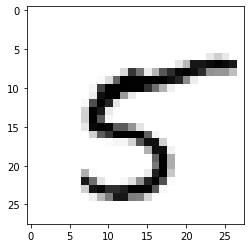

In [245]:
index = np.random.randint(0,60000)
plt.imshow(X_train[index,:].reshape(28,28), cmap = 'Greys')
print("The number is"+ Y_train[index]*" a square number"+(1 - Y_train[index])*" not a square number")

In [246]:
# Normalising

X_train =X_train/255
X_test = X_test/255

The model used here differs the one used for digit classification mainly by the output layer. The output layer used in the digit classification was a softmax layer, while we use a sigmoid activation function here to get either 0 or 1.

Similarly, we use Binary Cross entropy for losses here while we used a softmax cross entropy for the losses in the digit classification

In [247]:
model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),  # input shape required
                              tf.keras.layers.Dense(256, activation=tf.nn.relu),
                              tf.keras.layers.Dense(512, activation=tf.nn.relu),
                              tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
                            ])


In [248]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])


In [252]:
model.fit(X_train,Y_train, epochs=10 ,batch_size = 1000)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0939 - acc: 0.9683
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0817 - acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0734 - acc: 0.9756
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0667 - acc: 0.9777
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0636 - acc: 0.9790
Epoch 6/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0571 - acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0512 - acc: 0.9827
Epoch 8/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0482 - acc: 0.9842
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0452 - acc: 0.9851
Epoch 10/10
60000/60000 [==============================] - 

In [260]:
test_loss, test_acc = model.evaluate(X_test,Y_test)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.9817


The number is not a square number


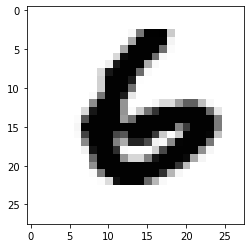

In [261]:
index = np.random.randint(0,10000)
plt.imshow(X_test[index,:].reshape(28,28), cmap = 'Greys')
a =  np.squeeze(model.predict(X_test)[index])

a = int(np.around(a))
print("The number is"+ a*" a square number"+(1 - a)*" not a square number")